In [ ]:
####################################################################################################
# NOTE: SINCE I'VE UPDATED THE FEATURE EXTRACTION CODE AND THIS CODE RELIES ON POSITIONAL FEATURES #
# THIS CODE WILL NO LONGER WORK                                                                    #
####################################################################################################

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import dotenv
import os
import json
from message import Message
from data_load import *
import numpy as np
from scipy.stats import f_oneway, chi2_contingency, shapiro, levene, kruskal
import plotly.graph_objects as go
import plotly.offline as pyo
import networkx as nx
pyo.init_notebook_mode(connected=True)


# Ensure that visuals appear inline in the notebook
%matplotlib inline

In [2]:
dotenv.load_dotenv()

messages_folder = os.getenv("MESSAGES_FOLDER_PATH")

messages, text_messages = load_messages_from_directory(messages_folder)

cleaned_text_messages = clean_and_filter_messages(text_messages, min_words=1)

features_tensor, sender_vector = extract_features_and_labels(cleaned_text_messages)

print(features_tensor.shape)
print(features_tensor[0])

Loading message_2.json
Loading message_3.json
Loading message_4.json
Loading message_5.json
Loading message_6.json
Loading message_1.json
torch.Size([56048, 16])
tensor([76.0000, 16.0000,  0.5000,  0.0000,  0.0000, 22.0000,  4.0000,  0.0000,
         4.0000, 59.0000,  0.9833,  3.8125,  0.0000,  0.0000,  0.0000,  0.0000])


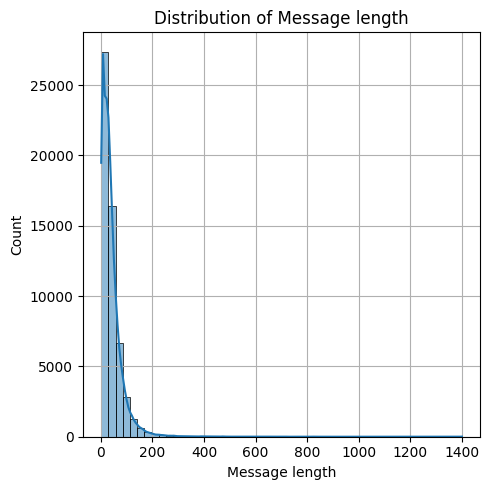

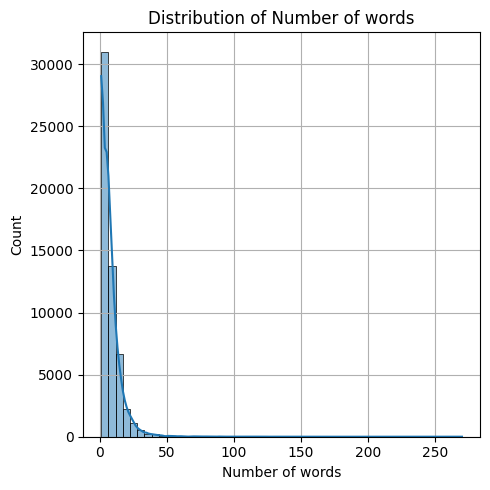

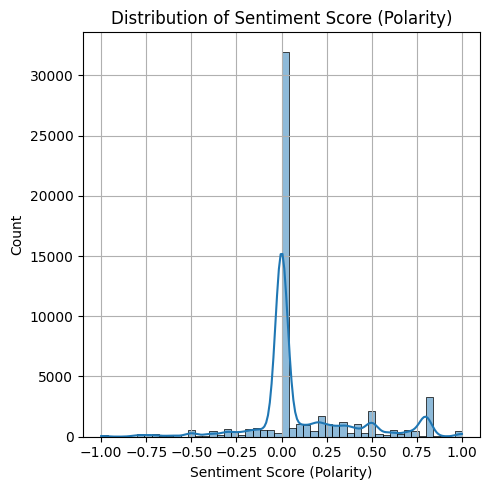

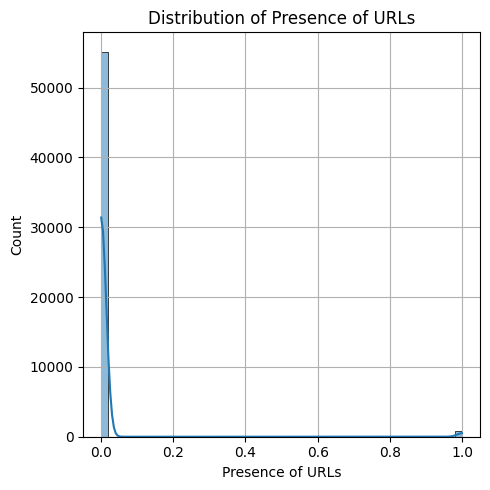

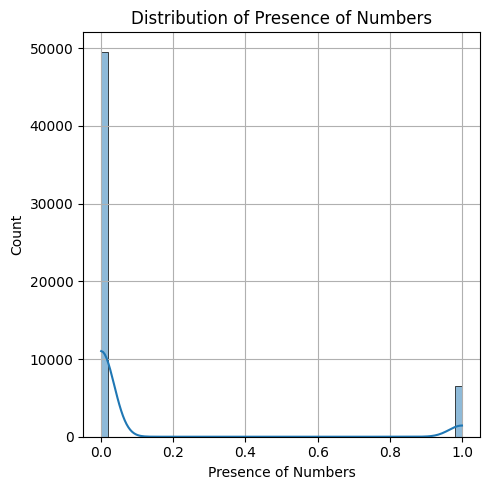

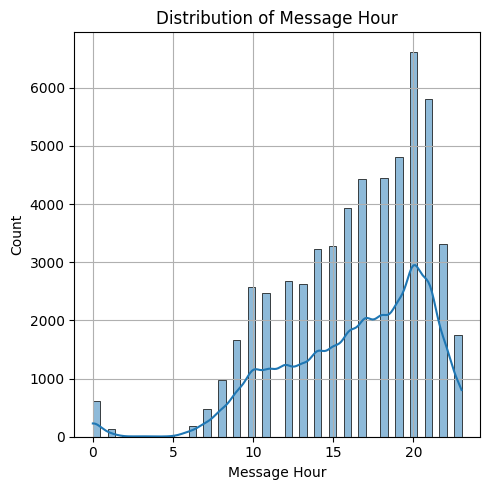

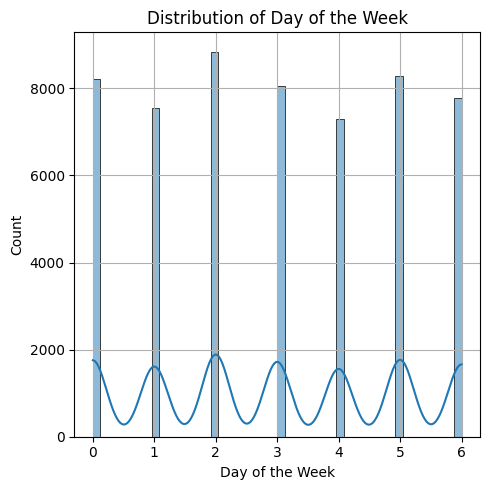

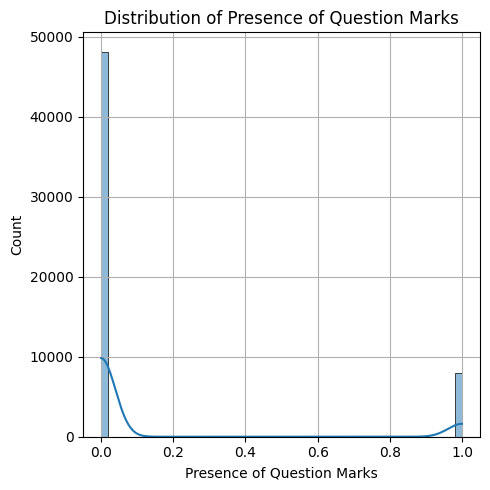

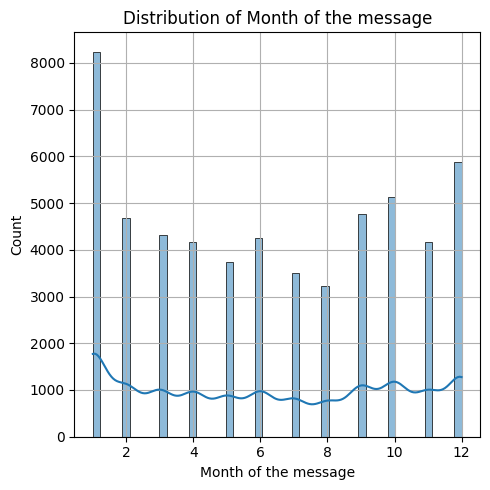

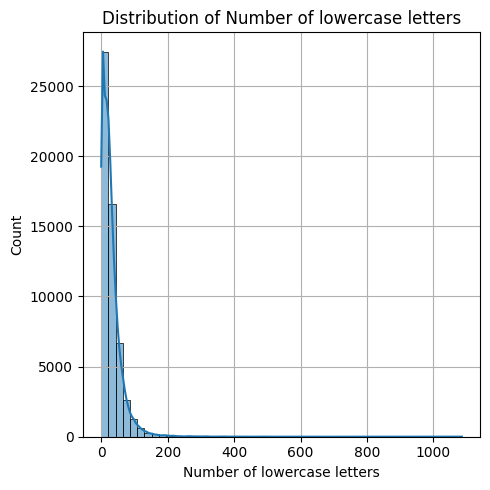

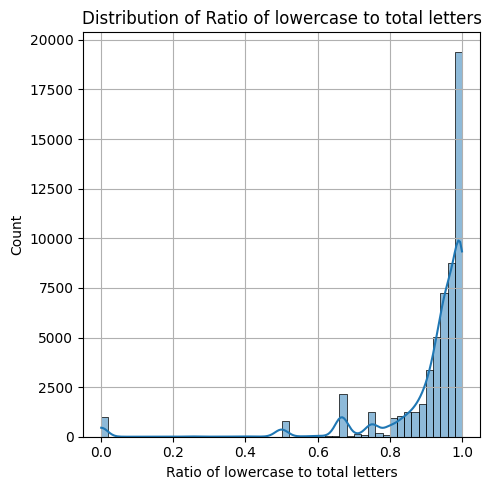

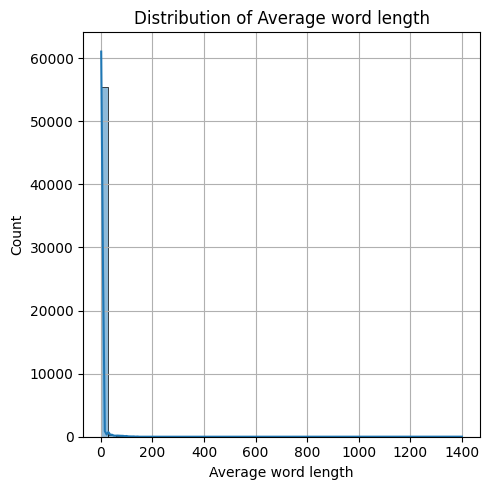

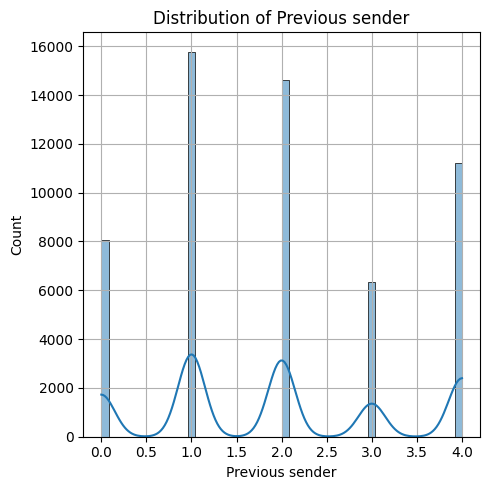

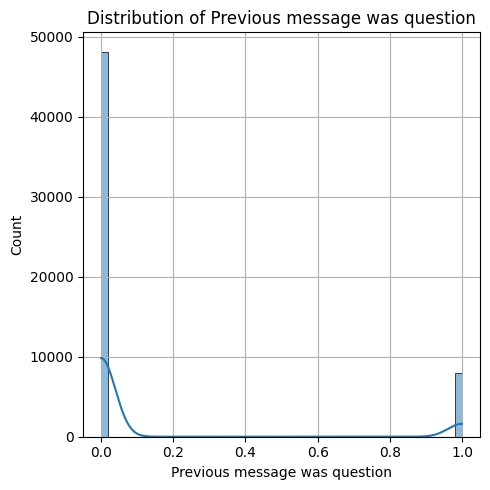

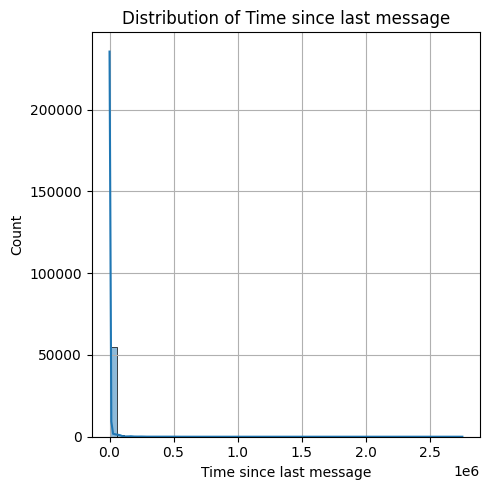

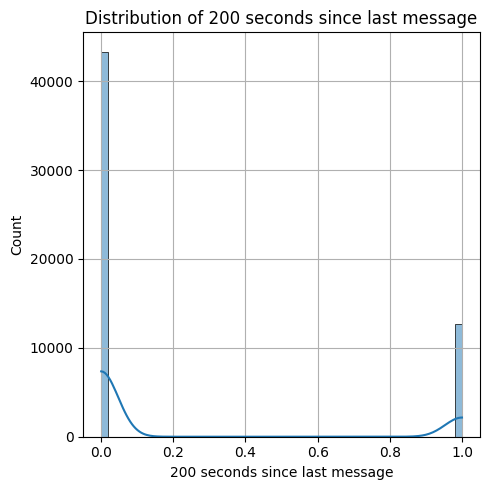

In [3]:
# Convert tensor to Pandas DataFrame
feature_headers = [
    "Message length", "Number of words", "Sentiment Score (Polarity)", "Presence of URLs",
    "Presence of Numbers", "Message Hour", "Day of the Week", "Presence of Question Marks",
    "Month of the message", "Number of lowercase letters", "Ratio of lowercase to total letters",
    "Average word length", "Previous sender", "Previous message was question", "Time since last message", "200 seconds since last message"
]
features_dataframe = pd.DataFrame(data=features_tensor.numpy(), columns=feature_headers)

senders = os.getenv("SENDER_ALIASES").split(",")

sender_indices = torch.argmax(sender_vector, dim=1)
sender_names = [senders[index] for index in sender_indices.numpy()]

features_dataframe["Sender"] = sender_names

# Plot distribution of each feature
for header in feature_headers:
    plt.figure(figsize=(5, 5))
    sns.histplot(features_dataframe[header], bins=50, kde=True)
    plt.title(f'Distribution of {header}')
    plt.xlabel(header)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
# Sort the DataFrame based on 'Message length' in descending order and take the top 10 rows
top_10_longest = features_dataframe.sort_values(by='Message length', ascending=False).head(50)

# Print the lengths
print("Top 50 Longest Messages by Length:")
for idx, row in top_10_longest.iterrows():
    print(f"Message Index: {idx}, Message Length: {row['Message length']}")


Top 50 Longest Messages by Length:
Message Index: 21559, Message Length: 1401.0
Message Index: 474, Message Length: 1401.0
Message Index: 18616, Message Length: 1401.0
Message Index: 10365, Message Length: 1401.0
Message Index: 21556, Message Length: 1288.0
Message Index: 49314, Message Length: 1040.0
Message Index: 52792, Message Length: 984.0
Message Index: 52833, Message Length: 850.0
Message Index: 53177, Message Length: 823.0
Message Index: 54700, Message Length: 823.0
Message Index: 38338, Message Length: 817.0
Message Index: 12444, Message Length: 792.0
Message Index: 45921, Message Length: 775.0
Message Index: 51831, Message Length: 743.0
Message Index: 51897, Message Length: 715.0
Message Index: 6442, Message Length: 713.0
Message Index: 24822, Message Length: 712.0
Message Index: 17663, Message Length: 708.0
Message Index: 12499, Message Length: 702.0
Message Index: 49338, Message Length: 698.0
Message Index: 51106, Message Length: 679.0
Message Index: 43336, Message Length: 

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Message length:
F-statistic: 80.79
P-value: 0.00000
Eta-squared: 0.01
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Message length:
H-statistic: 800.62
P-value: 0.00000
Eta-squared: 0.01


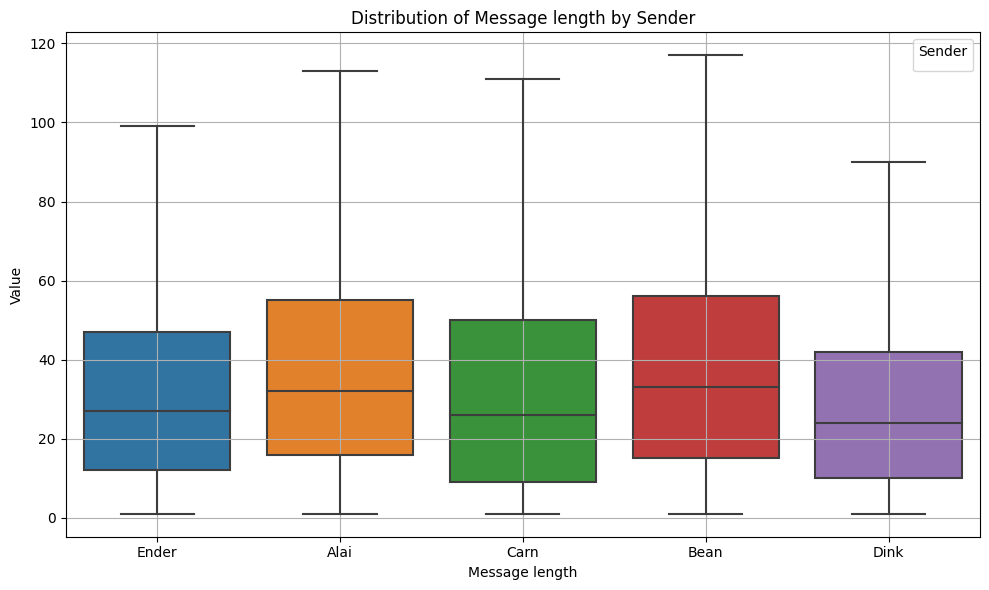

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Number of words:
F-statistic: 105.13
P-value: 0.00000
Eta-squared: 0.01
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Number of words:
H-statistic: 865.94
P-value: 0.00000
Eta-squared: 0.02


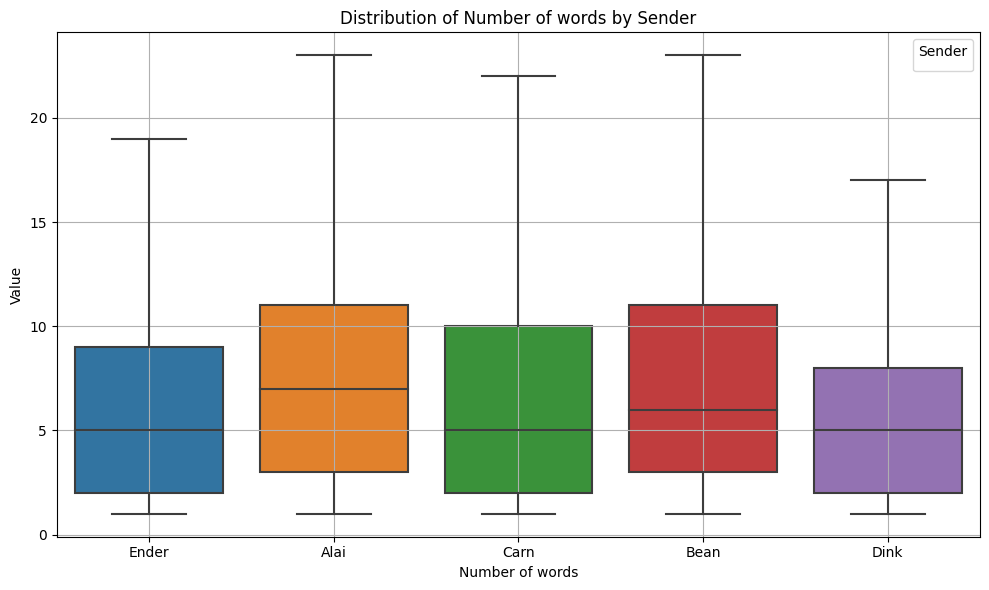

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Sentiment Score (Polarity):
F-statistic: 104.89
P-value: 0.00000
Eta-squared: 0.01
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Sentiment Score (Polarity):
H-statistic: 408.38
P-value: 0.00000
Eta-squared: 0.01


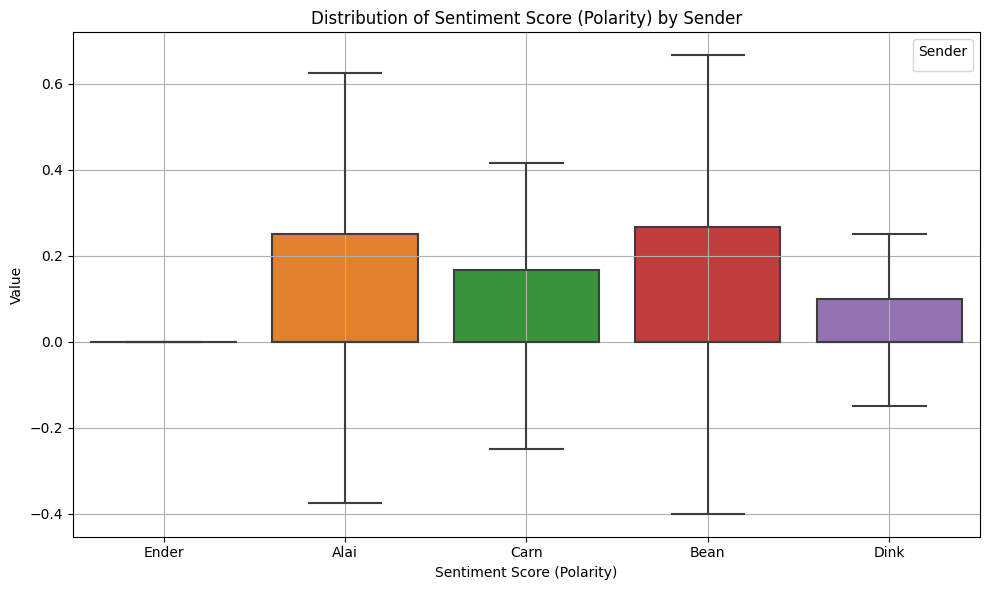


Chi-squared test for Presence of URLs:
Chi-squared statistic: 188.09
P-value: 0.00000
Cramér's V: 0.06


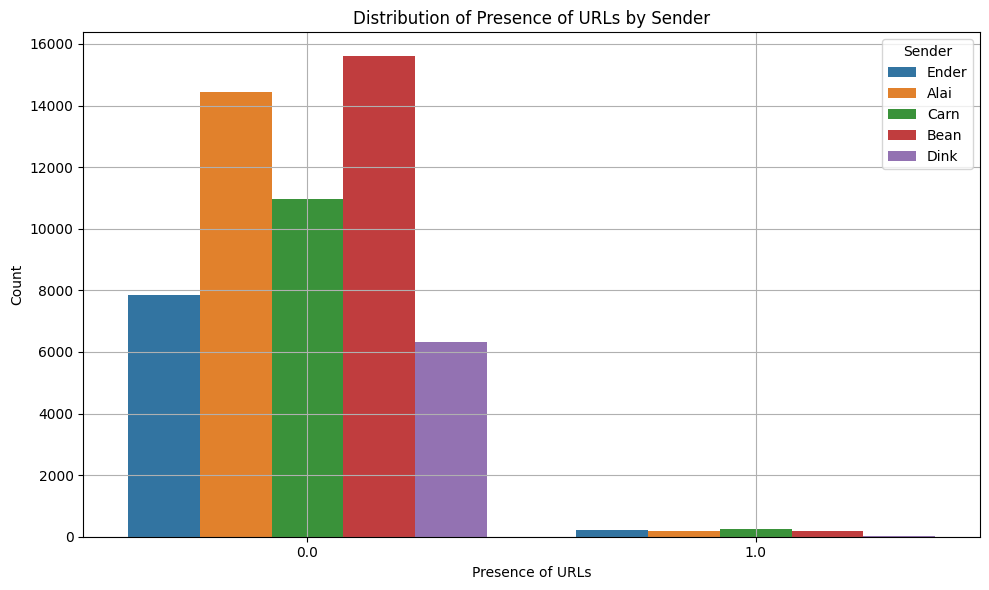


Chi-squared test for Presence of Numbers:
Chi-squared statistic: 258.68
P-value: 0.00000
Cramér's V: 0.07


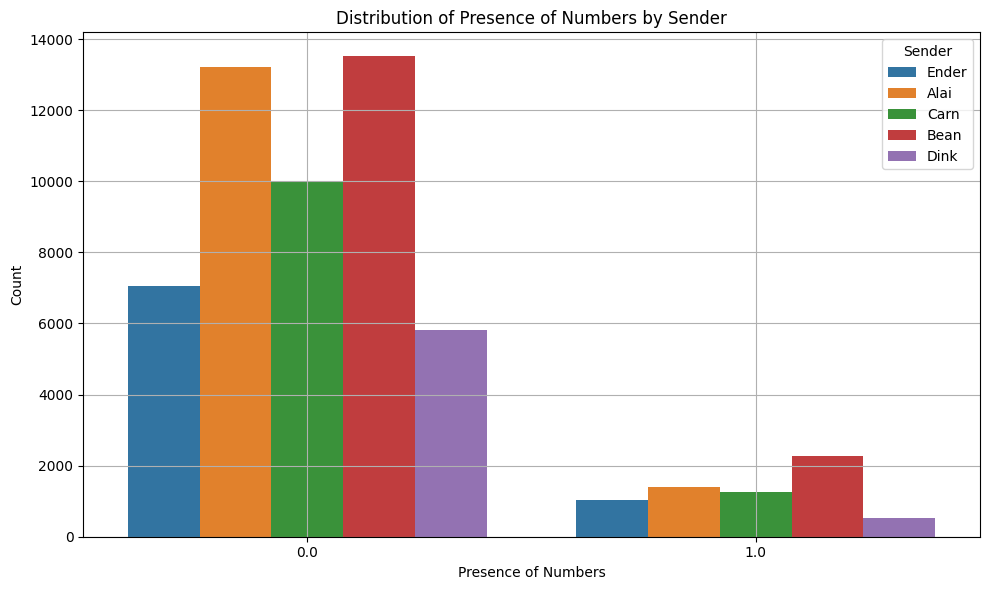

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Message Hour:
F-statistic: 11.28
P-value: 0.00000
Eta-squared: 0.00
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Message Hour:
H-statistic: 44.41
P-value: 0.00000
Eta-squared: 0.00


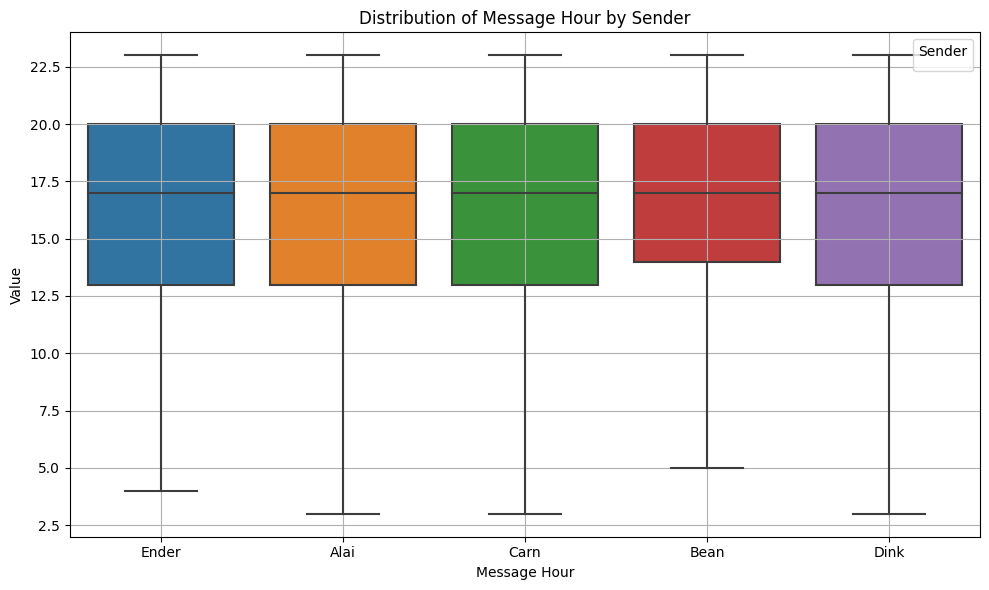


Chi-squared test for Day of the Week:
Chi-squared statistic: 369.46
P-value: 0.00000
Cramér's V: 0.04


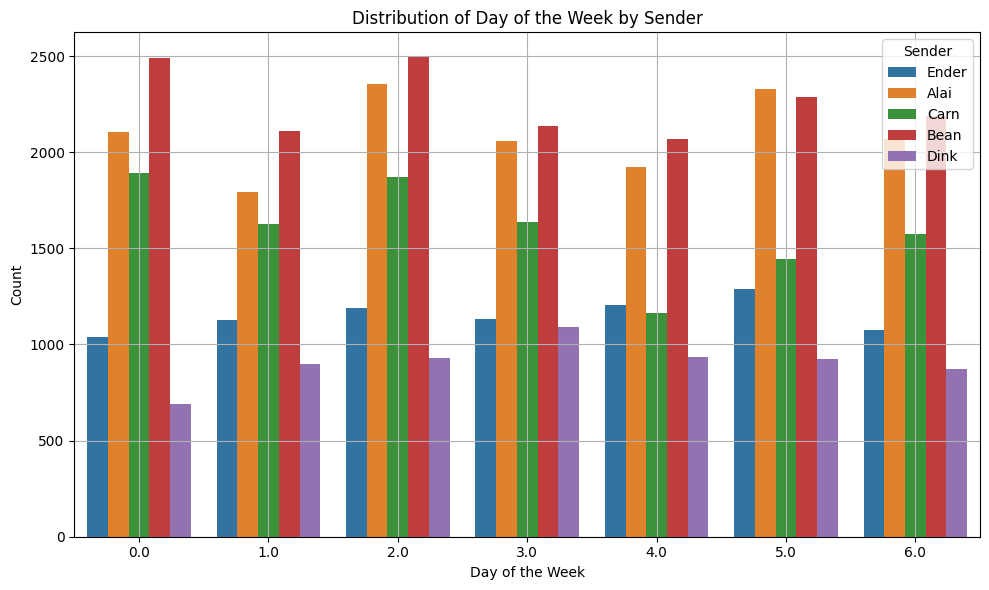


Chi-squared test for Presence of Question Marks:
Chi-squared statistic: 328.63
P-value: 0.00000
Cramér's V: 0.08


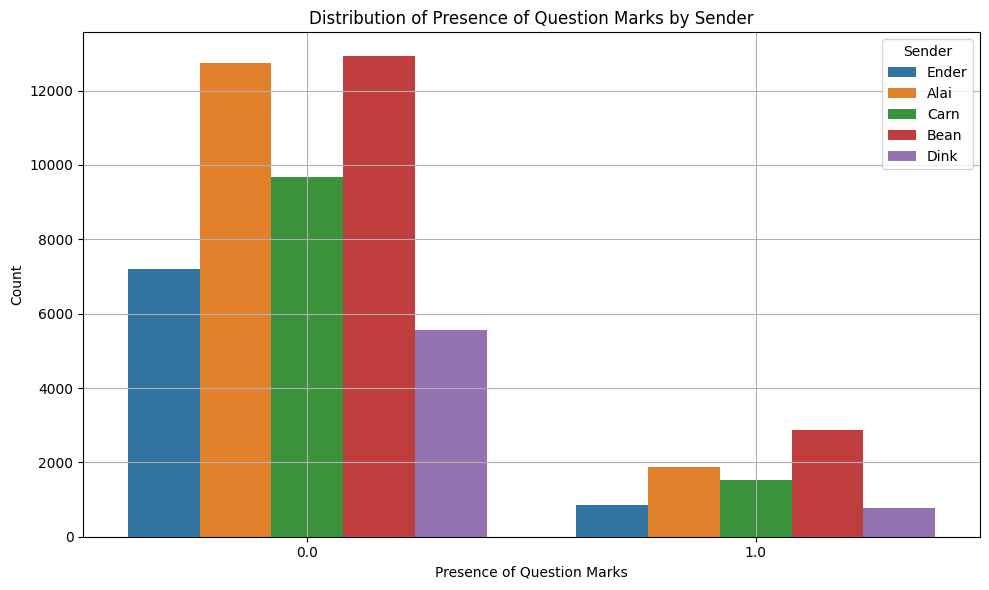


Chi-squared test for Month of the message:
Chi-squared statistic: 1508.29
P-value: 0.00000
Cramér's V: 0.08


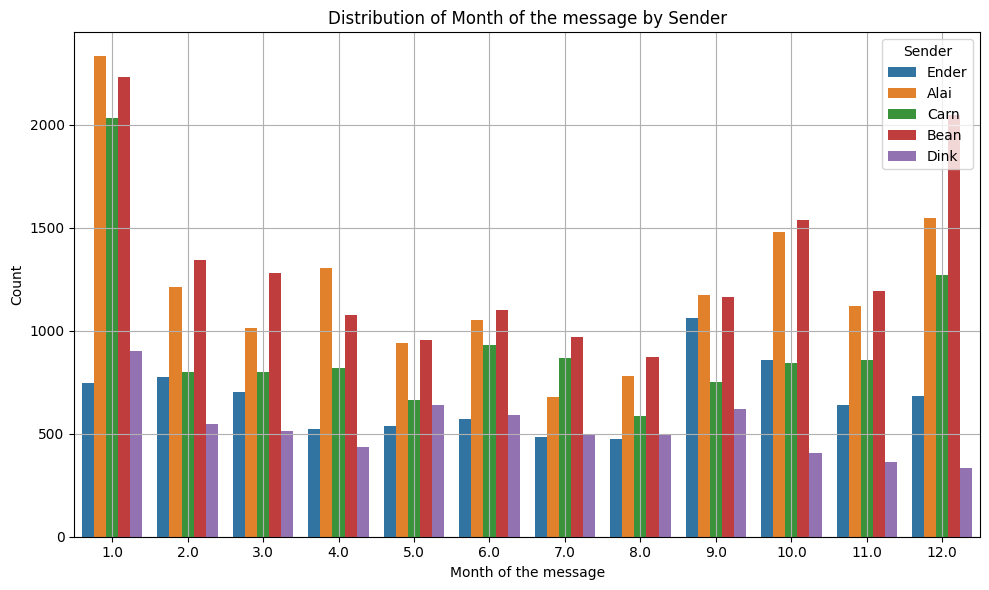

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Number of lowercase letters:
F-statistic: 95.13
P-value: 0.00000
Eta-squared: 0.01
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Number of lowercase letters:
H-statistic: 986.29
P-value: 0.00000
Eta-squared: 0.02


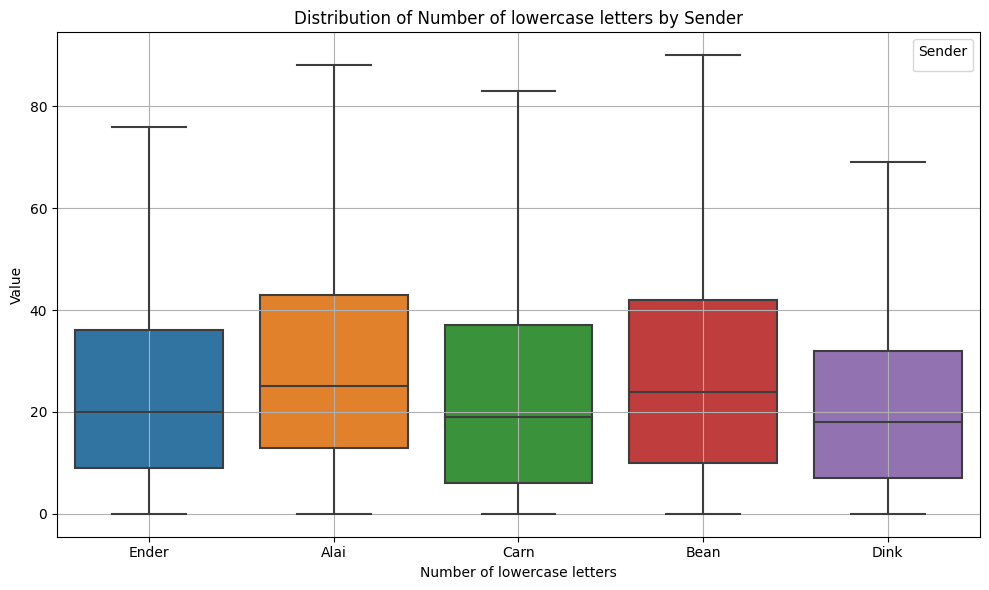

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Ratio of lowercase to total letters:
F-statistic: 990.67
P-value: 0.00000
Eta-squared: 0.07
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Ratio of lowercase to total letters:
H-statistic: 17849.47
P-value: 0.00000
Eta-squared: 0.32


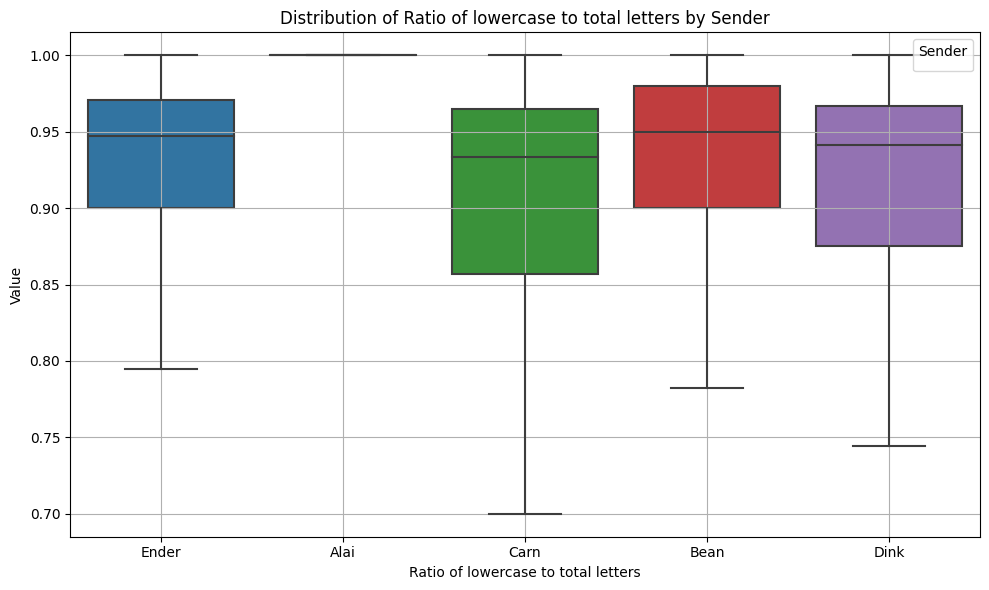

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Average word length:
F-statistic: 7.45
P-value: 0.00001
Eta-squared: 0.00
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Average word length:
H-statistic: 240.07
P-value: 0.00000
Eta-squared: 0.00


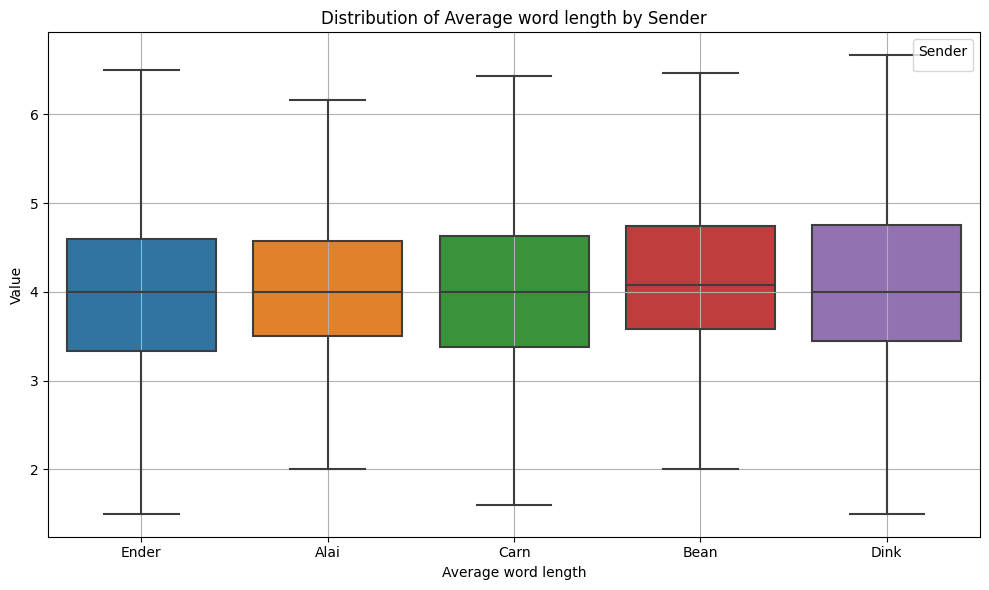


Chi-squared test for Previous sender:
Chi-squared statistic: 5766.97
P-value: 0.00000
Cramér's V: 0.16


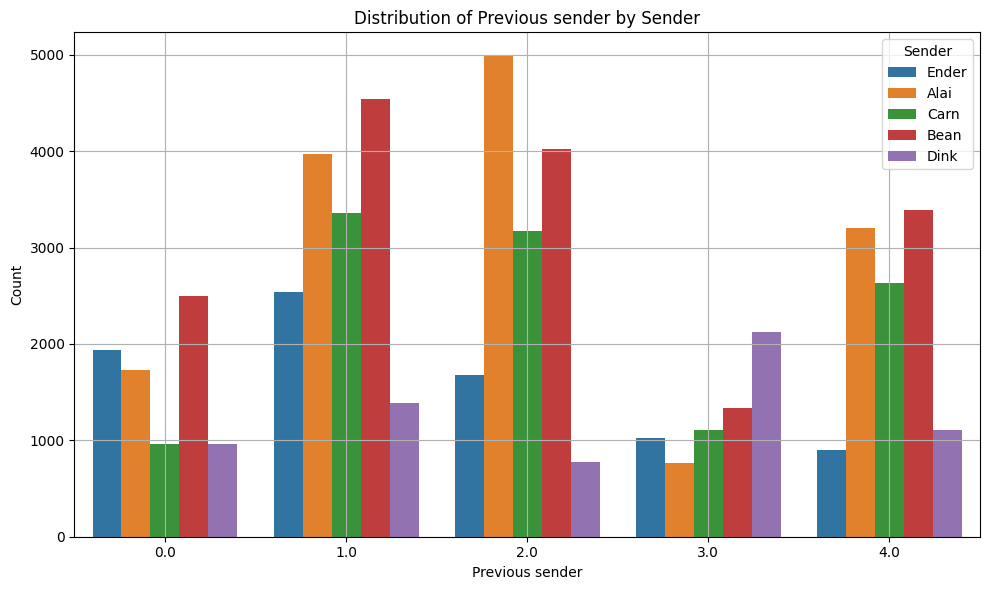


Chi-squared test for Previous message was question:
Chi-squared statistic: 74.43
P-value: 0.00000
Cramér's V: 0.04


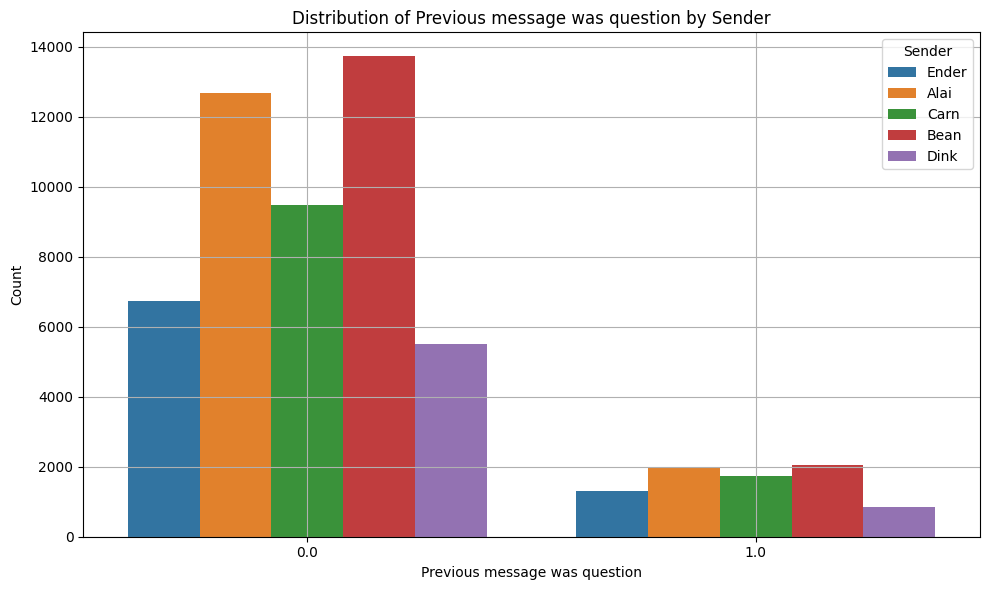

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



ANOVA for Time since last message:
F-statistic: 12.86
P-value: 0.00000
Eta-squared: 0.00
Normality assumption (all groups): Violated
Equal variances assumption: Violated

Kruskal-Wallis for Time since last message:
H-statistic: 290.08
P-value: 0.00000
Eta-squared: 0.01


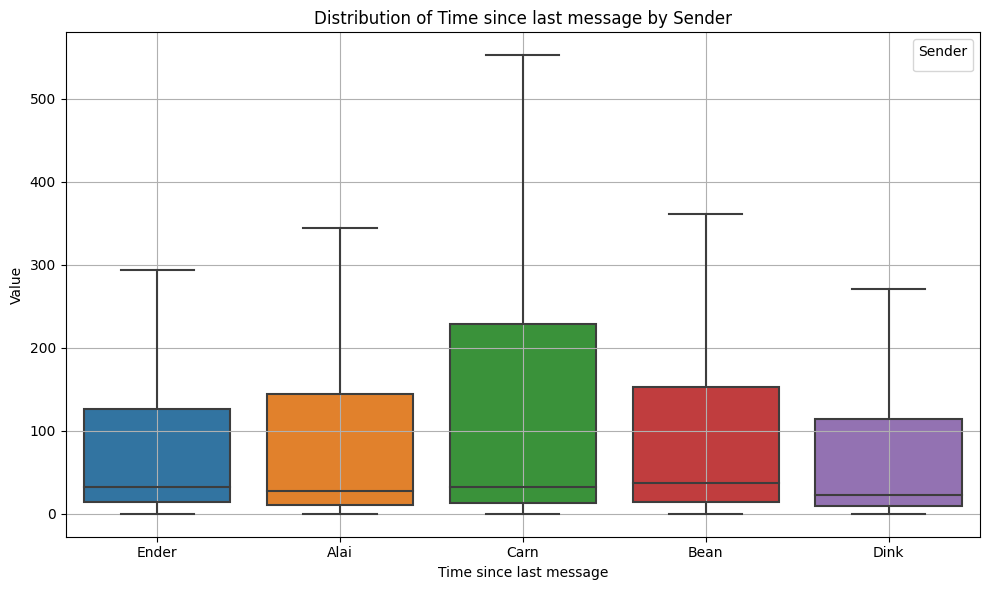


Chi-squared test for 200 seconds since last message:
Chi-squared statistic: 107.24
P-value: 0.00000
Cramér's V: 0.04


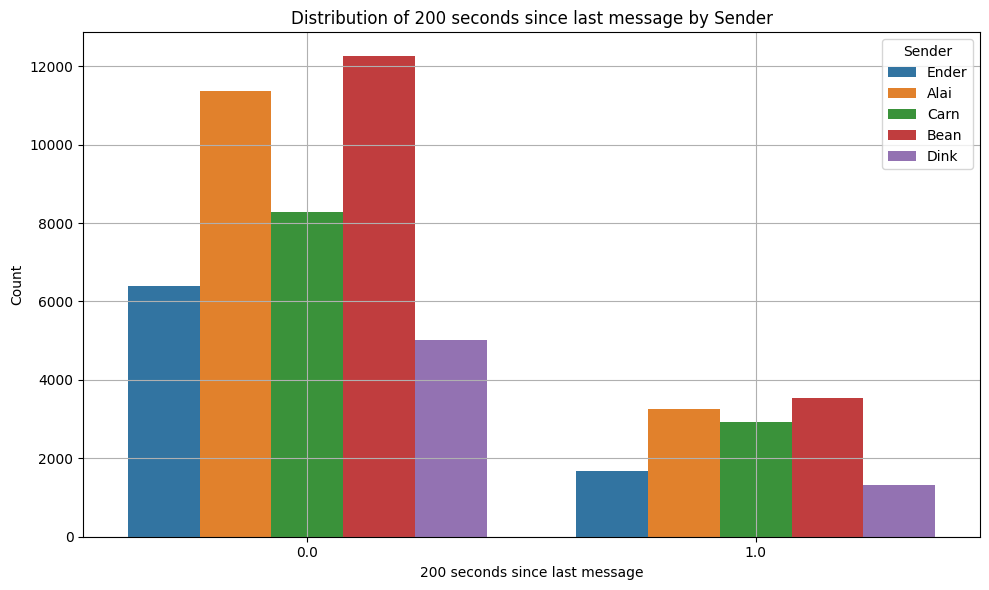

In [5]:
# Define the type of each feature for appropriate visualization
feature_types = {
    "Message length": "continuous",
    "Number of words": "continuous",
    "Sentiment Score (Polarity)": "continuous",
    "Presence of URLs": "categorical",
    "Presence of Numbers": "categorical",
    "Message Hour": "continuous",
    "Day of the Week": "categorical",
    "Presence of Question Marks": "categorical",
    "Month of the message": "categorical",
    "Number of lowercase letters": "continuous",
    "Ratio of lowercase to total letters": "continuous",
    "Average word length": "continuous",
    "Previous sender": "categorical",
    "Previous message was question": "categorical",
    "Time since last message": "continuous",
    "200 seconds since last message": "categorical",
}

# Assuming the sender names are in a 'Sender' column of features_dataframe:
senders = features_dataframe["Sender"].unique()

for header, feature_type in feature_types.items():
    plt.figure(figsize=(10, 6))

    if feature_type == "continuous":
        sns.boxplot(x="Sender", y=header, data=features_dataframe, showfliers=False)
        
        # Define groups
        groups = [features_dataframe[header][features_dataframe["Sender"] == sender] for sender in senders]
        
        # ANOVA
        f_stat, p_value = f_oneway(*groups)
        
        # Normality Test (Shapiro-Wilk)
        normality_p_values = [shapiro(group)[1] for group in groups]
        all_normal = all(p > 0.05 for p in normality_p_values)
        
        # Homogeneity of Variances Test (Levene)
        _, p_value_levene = levene(*groups)
        homogeneity_of_variances = p_value_levene > 0.05
        
        # Compute SS_total
        ss_total = sum([(item - features_dataframe[header].mean())**2 for item in features_dataframe[header]])
        
        # Compute SS_between
        group_means = features_dataframe.groupby('Sender')[header].mean()
        group_counts = features_dataframe.groupby('Sender').count()[header]
        grand_mean = features_dataframe[header].mean()
        ss_between = sum([group_counts[sender] * (group_means[sender] - grand_mean)**2 for sender in group_counts.index])
        
        eta_squared_anova = ss_between/ss_total
        
        # Kruskal-Wallis test
        H_stat, p_value_kruskal = kruskal(*groups)
        eta_squared_kruskal = H_stat / (len(features_dataframe) - 1)
        
        print(f"\nANOVA for {header}:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"P-value: {p_value:.5f}")
        print(f"Eta-squared: {eta_squared_anova:.2f}")
        print(f"Normality assumption (all groups): {'Met' if all_normal else 'Violated'}")
        print(f"Equal variances assumption: {'Met' if homogeneity_of_variances else 'Violated'}")
        
        print(f"\nKruskal-Wallis for {header}:")
        print(f"H-statistic: {H_stat:.2f}")
        print(f"P-value: {p_value_kruskal:.5f}")
        print(f"Eta-squared: {eta_squared_kruskal:.2f}")


    elif feature_type == "categorical":
        sns.countplot(x=header, hue="Sender", data=features_dataframe)
        
        # Perform Chi-Squared Test for categorical features
        contingency = pd.crosstab(features_dataframe[header], features_dataframe["Sender"])
        chi2, p_value, _, _ = chi2_contingency(contingency)
        
        # Compute Cramér's V for effect size
        n = contingency.sum().sum()
        phi2 = chi2/n
        r, k = contingency.shape
        cramers_v = np.sqrt(phi2 / min(k-1, r-1))

        print(f"\nChi-squared test for {header}:")
        print(f"Chi-squared statistic: {chi2:.2f}")
        print(f"P-value: {p_value:.5f}")
        print(f"Cramér's V: {cramers_v:.2f}")

    plt.title(f'Distribution of {header} by Sender')
    plt.xlabel(header)
    plt.ylabel('Count' if feature_type == "categorical" else 'Value')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Sender", loc='upper right')
    plt.show()


In [6]:
senders = os.getenv("SENDER_ALIASES").split(",")
senders

['Ender', 'Bean', 'Alai', 'Dink', 'Carn']

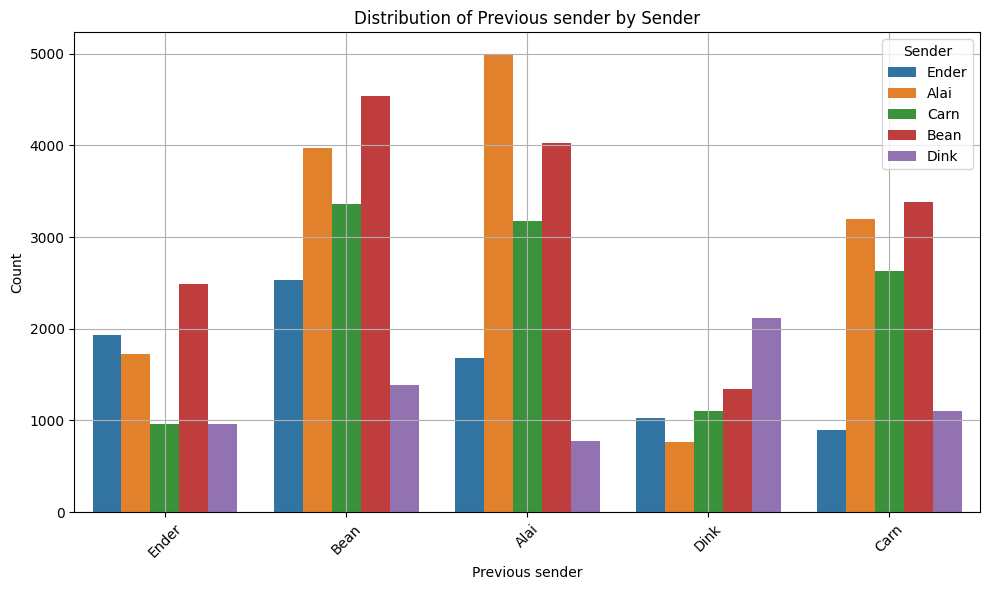

In [7]:
header = "Previous sender"
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=header, hue="Sender", data=features_dataframe)
ax.set_xticklabels(senders, rotation=45)  # you can adjust the rotation if needed
plt.title(f'Distribution of {header} by Sender')
plt.xlabel(header)
plt.ylabel('Count' if feature_type == "categorical" else 'Value')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Sender", loc='upper right')
plt.show()

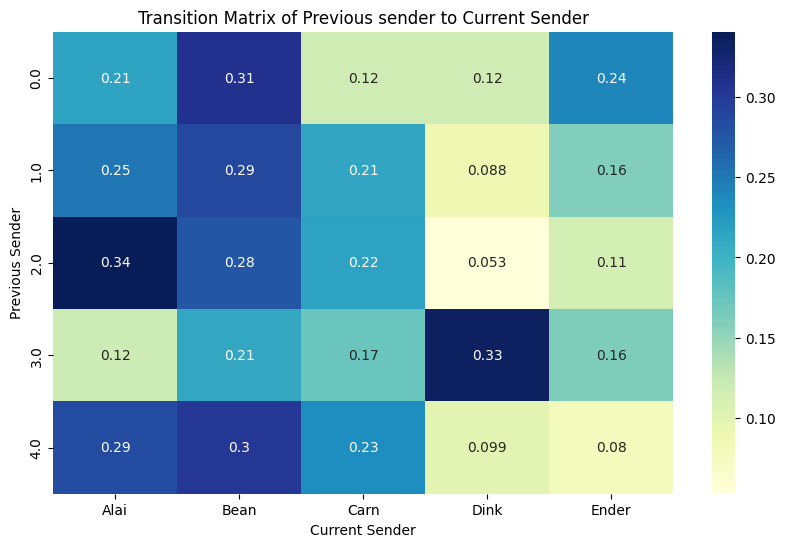

In [8]:
# Create a transition matrix
transition_matrix = pd.crosstab(features_dataframe[header], features_dataframe['Sender'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu")
plt.title(f'Transition Matrix of {header} to Current Sender')
plt.xlabel('Current Sender')
plt.ylabel('Previous Sender')
plt.show()

In [9]:
# Map integer labels back to sender names
transition_matrix = pd.crosstab(features_dataframe[header].map(lambda x: senders[int(x)]), 
                                features_dataframe['Sender'], 
                                rownames=['Previous Sender'], 
                                colnames=['Current Sender'])

# Build source, target, and value lists
source, target, value = [], [], []
color_links = []  # List to store colors for the links

for i, row_name in enumerate(transition_matrix.index):
    for j, col_name in enumerate(transition_matrix.columns):
        source.append(i)
        target.append(j + len(transition_matrix.index))
        value.append(transition_matrix.loc[row_name, col_name])
        
        if row_name == col_name:
            # If the previous sender is the same as the current sender, assign a distinct color
            color_links.append('darkblue')
        else:
            color_links.append('lightblue')

# Combine previous senders and senders for node labels
all_labels = list(transition_matrix.index) + list(transition_matrix.columns)

# Define colors for the nodes (consistent for both previous and current senders)
node_colors = sns.color_palette("husl", len(senders)).as_hex()

# Convert your color_links to rgba with desired opacity
translucent_links = [mcolors.to_rgba(color, alpha=0.5) for color in color_links]

# Convert RGBA to string format for plotly
translucent_links_str = [f'rgba({int(r*255)},{int(g*255)},{int(b*255)},{a})' for r, g, b, a in translucent_links]

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15, 
        thickness = 20, 
        line = dict(color = "black", width = 0.5), 
        label = all_labels,
        color = node_colors*2  # Repeat the colors for both previous and current senders
    ),
    link = dict(
        source = source, 
        target = target, 
        value = value, 
        color = translucent_links_str,  # Use the translucent colors
    ))])

fig.update_layout(title_text=f"Sankey Diagram of {header} to Current Sender", font_size=10)

# Output the diagram as an HTML file
pyo.plot(fig, filename='previous_sender_sankey_diagram.html', auto_open=True)


'previous_sender_sankey_diagram.html'

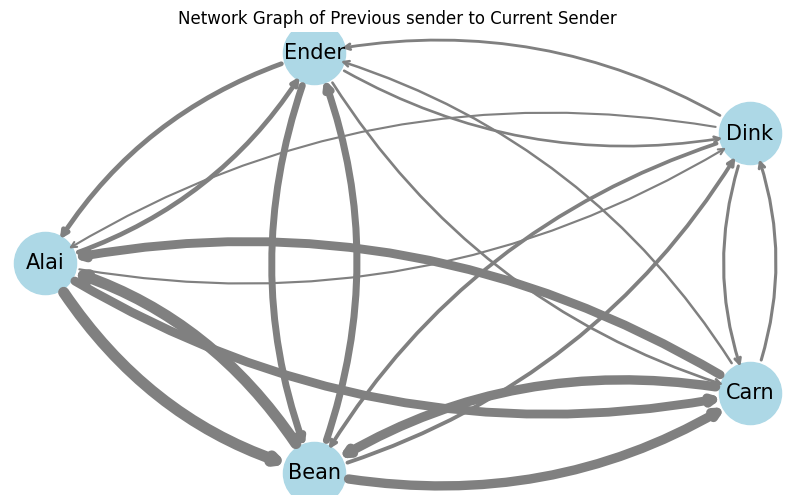

In [10]:
# Network diagram

# Create a transition matrix 
transition_matrix = pd.crosstab(features_dataframe[header].map(lambda x: senders[int(x)]), 
                                features_dataframe['Sender'])

G = nx.from_pandas_adjacency(transition_matrix, create_using=nx.DiGraph())

# Set the weights as an attribute for the edges
for (u, v, d) in G.edges(data=True):
    d['weight'] = transition_matrix.loc[u, v]

# Calculate the positions
shell_pos = nx.shell_layout(G)

def edge_plot(G, pos, ax, alpha=1, edge_color="k", width=1):
    for n, nbrs in G.adjacency():
        for nbr, eattr in nbrs.items():
            lw = eattr['weight'] / 500.0  # Modify the division for desired width
            rad = 0.2  # This will determine the distance from the node
            color = edge_color

            if G.is_directed():
                arrows = True
            else:
                arrows = False

            if G.is_multigraph():
                if not arrows:
                    edge_pos = np.asarray([(1 - rad) * pos[n][0] + rad * pos[nbr][0],
                                           (1 - rad) * pos[n][1] + rad * pos[nbr][1]])
                else:
                    edge_pos = pos[nbr]
            else:
                edge_pos = pos[nbr]

            ax.annotate("",
                        xy=edge_pos, xycoords='data',
                        xytext=pos[n], textcoords='data',
                        arrowprops=dict(arrowstyle="->", color=color,
                                        shrinkA=25, shrinkB=20,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(rad)),
                                        linewidth=lw  # This will control the thickness of the edge
                                        ),
                        )

fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G, shell_pos, node_color='lightblue', node_size=2000, ax=ax)
# Draw edges using the edge_plot function
edge_plot(G, shell_pos, ax=ax, edge_color='gray', alpha=0.5)
# Draw node labels
nx.draw_networkx_labels(G, shell_pos, ax=ax, font_size=15)

plt.title(f'Network Graph of {header} to Current Sender')
plt.axis("off")
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
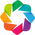

:Chord   [Source,Target]   (Value)

In [11]:
# Chord diagram

import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')

# Create a transition matrix with sender names
transition_matrix = pd.crosstab(features_dataframe[header].map(lambda x: senders[int(x)]), 
                                features_dataframe['Sender'])
transition_matrix = transition_matrix.stack().reset_index()
transition_matrix.columns = ['Source', 'Target', 'Value']

chord = hv.Chord(transition_matrix)
chord.opts(
    opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('Source').str(), 
               labels='index', node_color=dim('index').str())
)


In [12]:
# Sankey diagram normalized so that each current sender (right of diagram) totals to 1
# Link thickness corresponds to % of current sender's messages for which the previous sender (left of diagram) sent the directly preceeding message

# Create a transition matrix without the rownames and colnames for now
transition_matrix = pd.crosstab(features_dataframe[header].map(lambda x: senders[int(x)]), 
                                features_dataframe['Sender'])

# Normalize the transition matrix values to get proportions
normalized_transition_matrix = transition_matrix.divide(transition_matrix.sum(axis=0), axis=1)

# Build source, target, and value lists
source, target, value = [], [], []
color_links = []  # List to store colors for the links

for i, row_name in enumerate(normalized_transition_matrix.index):
    for j, col_name in enumerate(normalized_transition_matrix.columns):
        source.append(i)
        target.append(j + len(normalized_transition_matrix.index))
        value.append(normalized_transition_matrix.loc[row_name, col_name])
        
        if row_name == col_name:
            # If the previous sender is the same as the current sender, assign a distinct color
            color_links.append('darkblue')
        else:
            color_links.append('lightblue')

# Combine previous senders and senders for node labels
all_labels = list(normalized_transition_matrix.index) + list(normalized_transition_matrix.columns)

# Define colors for the nodes (consistent for both previous and current senders)
node_colors = sns.color_palette("husl", len(senders)).as_hex()

# Convert your color_links to rgba with desired opacity
translucent_links = [mcolors.to_rgba(color, alpha=0.5) for color in color_links]

# Convert RGBA to string format for plotly
translucent_links_str = [f'rgba({int(r*255)},{int(g*255)},{int(b*255)},{a})' for r, g, b, a in translucent_links]

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15, 
        thickness = 20, 
        line = dict(color = "black", width = 0.5), 
        label = all_labels,
        color = node_colors*2  # Repeat the colors for both previous and current senders
    ),
    link = dict(
        source = source, 
        target = target, 
        value = value, 
        color = translucent_links_str,  # Use the translucent colors
    ))])

fig.update_layout(title_text=f"Sankey Diagram of {header} to Current Sender (Proportions)", font_size=10)

# Output the diagram as an HTML file
pyo.plot(fig, filename='proportional_previous_sender_sankey_diagram.html', auto_open=True)


'proportional_previous_sender_sankey_diagram.html'